In [10]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
%matplotlib notebook

import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

from models.bandit_model_comparison import BanditModelComparison
from utils.run_fit_behavior import *

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

The very first attempt: Hattori 2019 wins!

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 15590.1, BIC = 15604.5 (done in 65.4 secs)
Model 2/8:     RW1972_epsi, Km = 3 ... AIC = 12657.8, BIC = 12679.4 (done in 43.5 secs)
Model 3/8:     LNP_softmax, Km = 3 ... AIC = 10061.3, BIC = 10082.9 (done in 68.1 secs)
Model 4/8:     LNP_softmax, Km = 5 ... AIC = 10021, BIC = 10056.9 (done in 136 secs)
Model 5/8:  RW1972_softmax, Km = 3 ... AIC = 12379.9, BIC = 12401.5 (done in 33.2 secs)
Model 6/8:     Hattori2019, Km = 4 ... AIC = 12350.4, BIC = 12379.2 (done in 41.6 secs)
Model 7/8:        Bari2019, Km = 4 ... AIC = 10085.9, BIC = 10114.7 (done in 146 secs)
Model 8/8:     Hattori2019, Km = 5 ... AIC = 9471.97, BIC = 9507.95 (done in 94.9 secs)


<IPython.core.display.Javascript object>


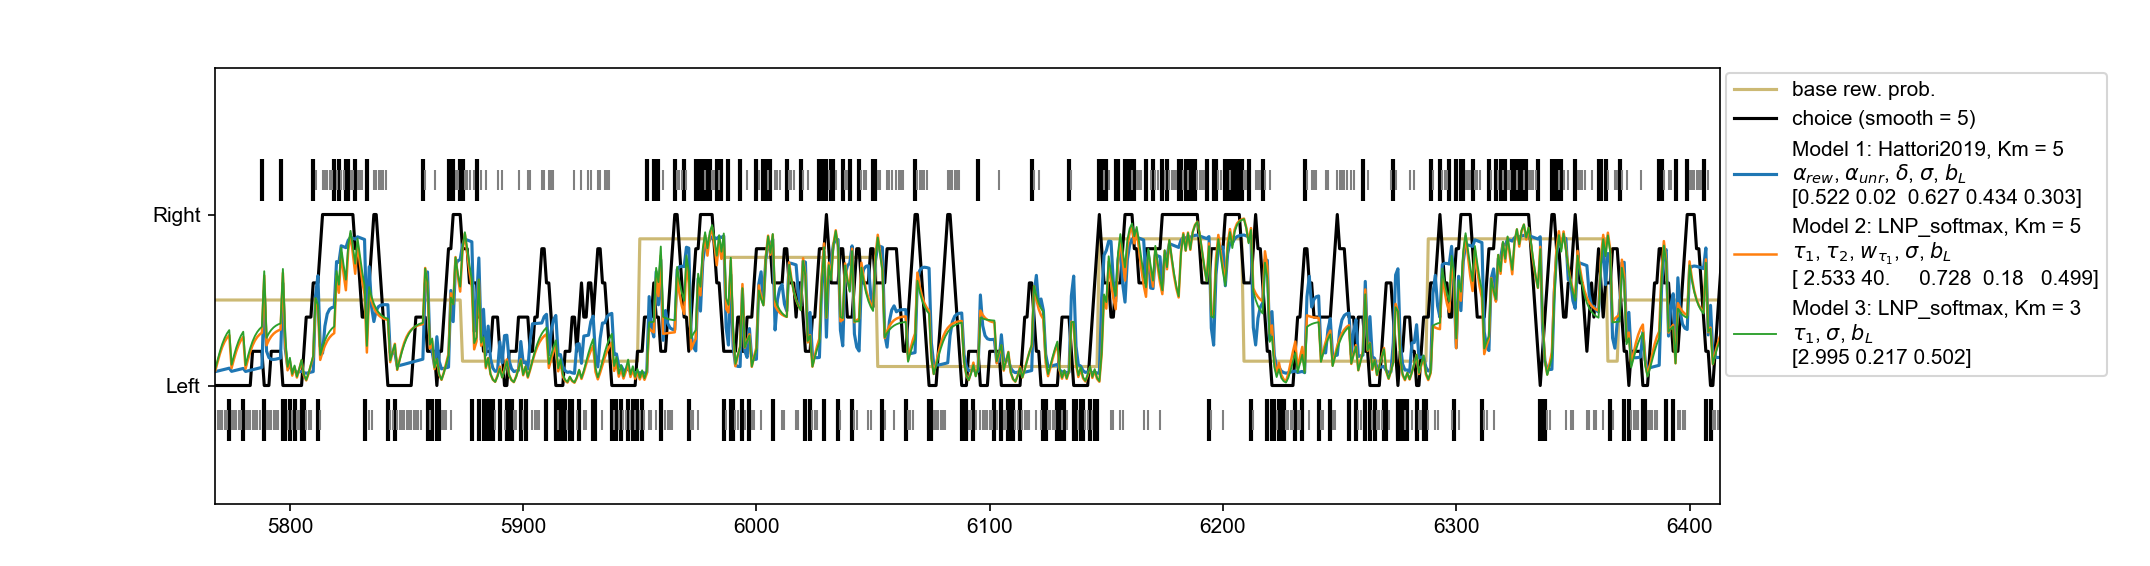

,model,Km,AIC,log10_BF_AIC,BIC,log10_BF_BIC,para_notation,para_fitted
8,Hattori2019,5,9471.97,-0.00,9507.95,-0.00,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$","[0.522, 0.02, 0.627, 0.434, 0.303]"
4,LNP_softmax,5,10020.96,-119.21,10056.95,-119.21,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$","[2.533, 40.0, 0.728, 0.18, 0.499]"
3,LNP_softmax,3,10061.30,-127.97,10082.89,-124.85,"$\tau_1$, $\sigma$, $b_L$","[2.995, 0.217, 0.502]"
7,Bari2019,4,10085.95,-133.32,10114.74,-131.76,"$\alpha_{rew}$, $\delta$, $\sigma$, $b_L$","[0.013, 0.275, 0.01, 0.504]"
6,Hattori2019,4,12350.43,-625.05,12379.22,-623.49,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$","[0.567, 0.296, 0.665, 0.579]"
5,RW1972_softmax,3,12379.87,-631.44,12401.47,-628.32,"$\alpha_{rew}$, $\sigma$, $b_L$","[0.368, 0.563, 0.574]"
2,RW1972_epsi,3,12657.85,-691.80,12679.44,-688.68,"$\alpha_{rew}$, $\epsilon$, $b_L$","[0.55, 0.743, 0.166]"
1,LossCounting,2,15590.13,-1328.54,15604.53,-1323.85,"$\mu_{LC}$, $\sigma_{LC}$","[13.569, 10.0]"


<IPython.core.display.Javascript object>


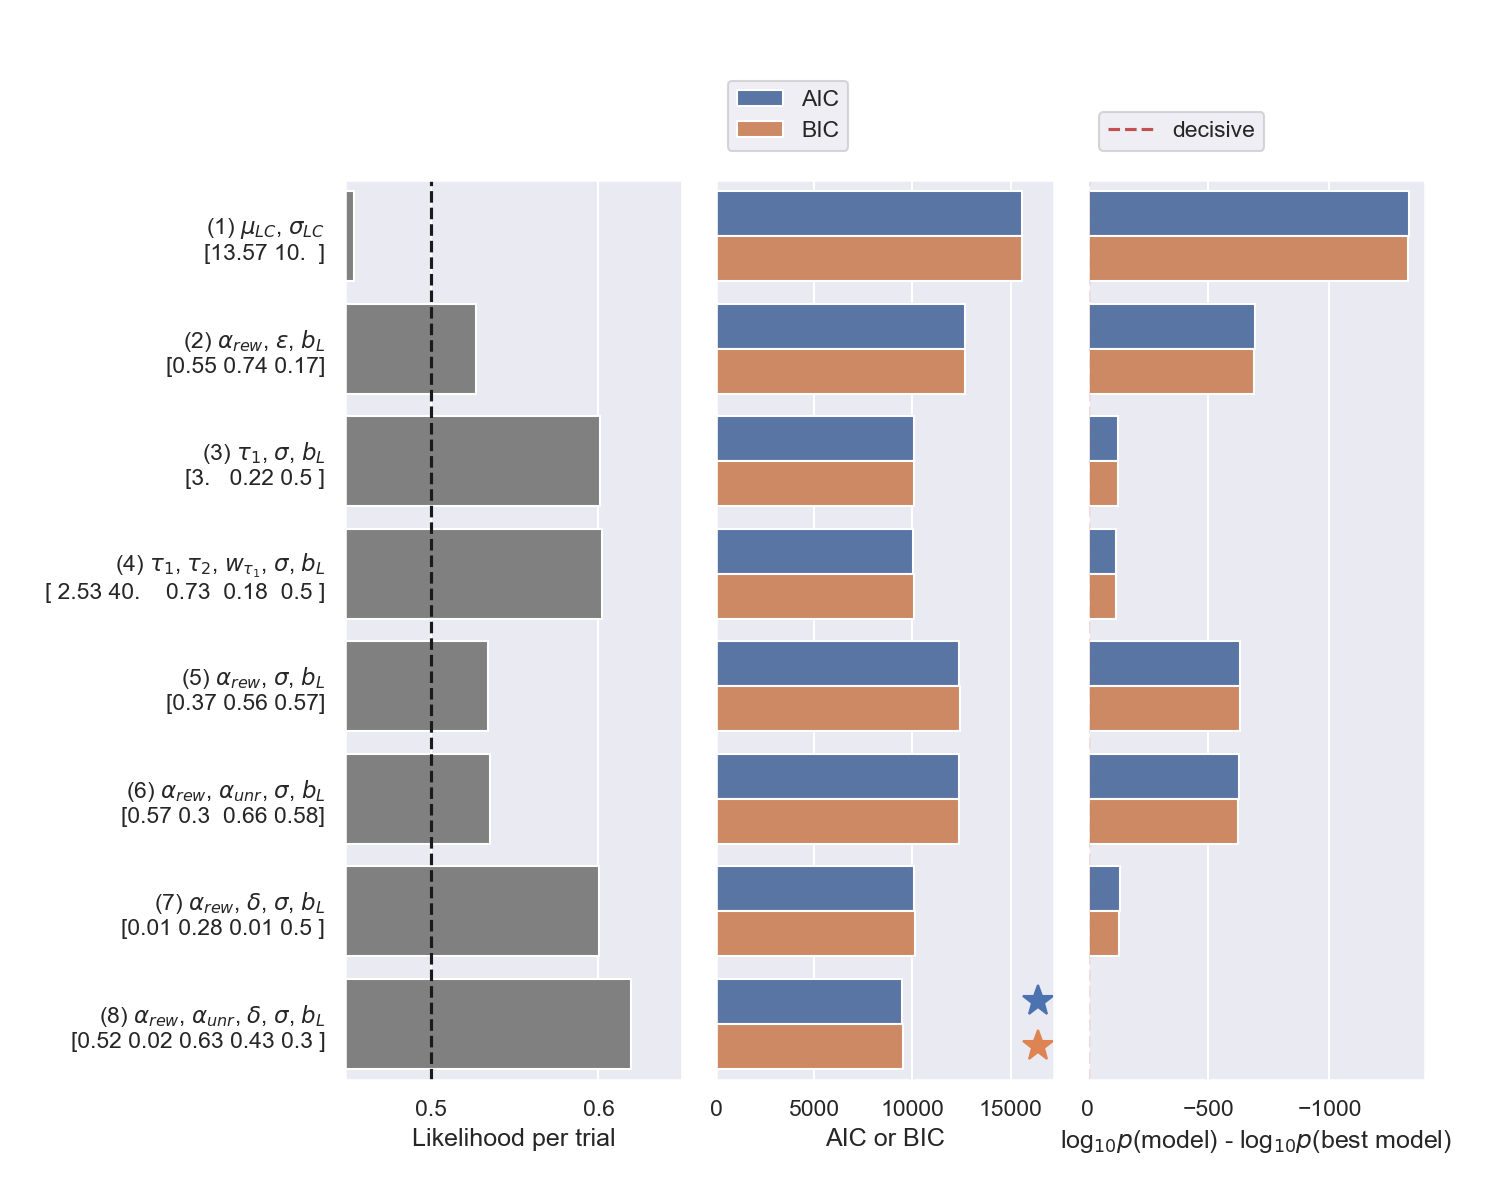

In [18]:
data = np.load("export\\FOR01.npz")
model_comparison = behavior_model_comparison(data, pool = pool, models = [1,9,10,11,12,13,14,15])

13433
=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 19078.3, BIC = 19093.3 (done in 61.7 secs)
Model 2/8:     RW1972_epsi, Km = 3 ... AIC = 17506.2, BIC = 17528.7 (done in 66.5 secs)
Model 3/8:     LNP_softmax, Km = 3 ... AIC = 15109.4, BIC = 15131.9 (done in 89.2 secs)
Model 4/8:     LNP_softmax, Km = 5 ... AIC = 14955.9, BIC = 14993.4 (done in 212 secs)
Model 5/8:  RW1972_softmax, Km = 3 ... AIC = 17195.1, BIC = 17217.6 (done in 44.3 secs)
Model 6/8:     Hattori2019, Km = 4 ... AIC = 17173, BIC = 17203 (done in 51.8 secs)
Model 7/8:        Bari2019, Km = 4 ... AIC = 15129.3, BIC = 15159.3 (done in 125 secs)
Model 8/8:     Hattori2019, Km = 5 ... AIC = 14749.2, BIC = 14786.8 (done in 105 secs)


<IPython.core.display.Javascript object>


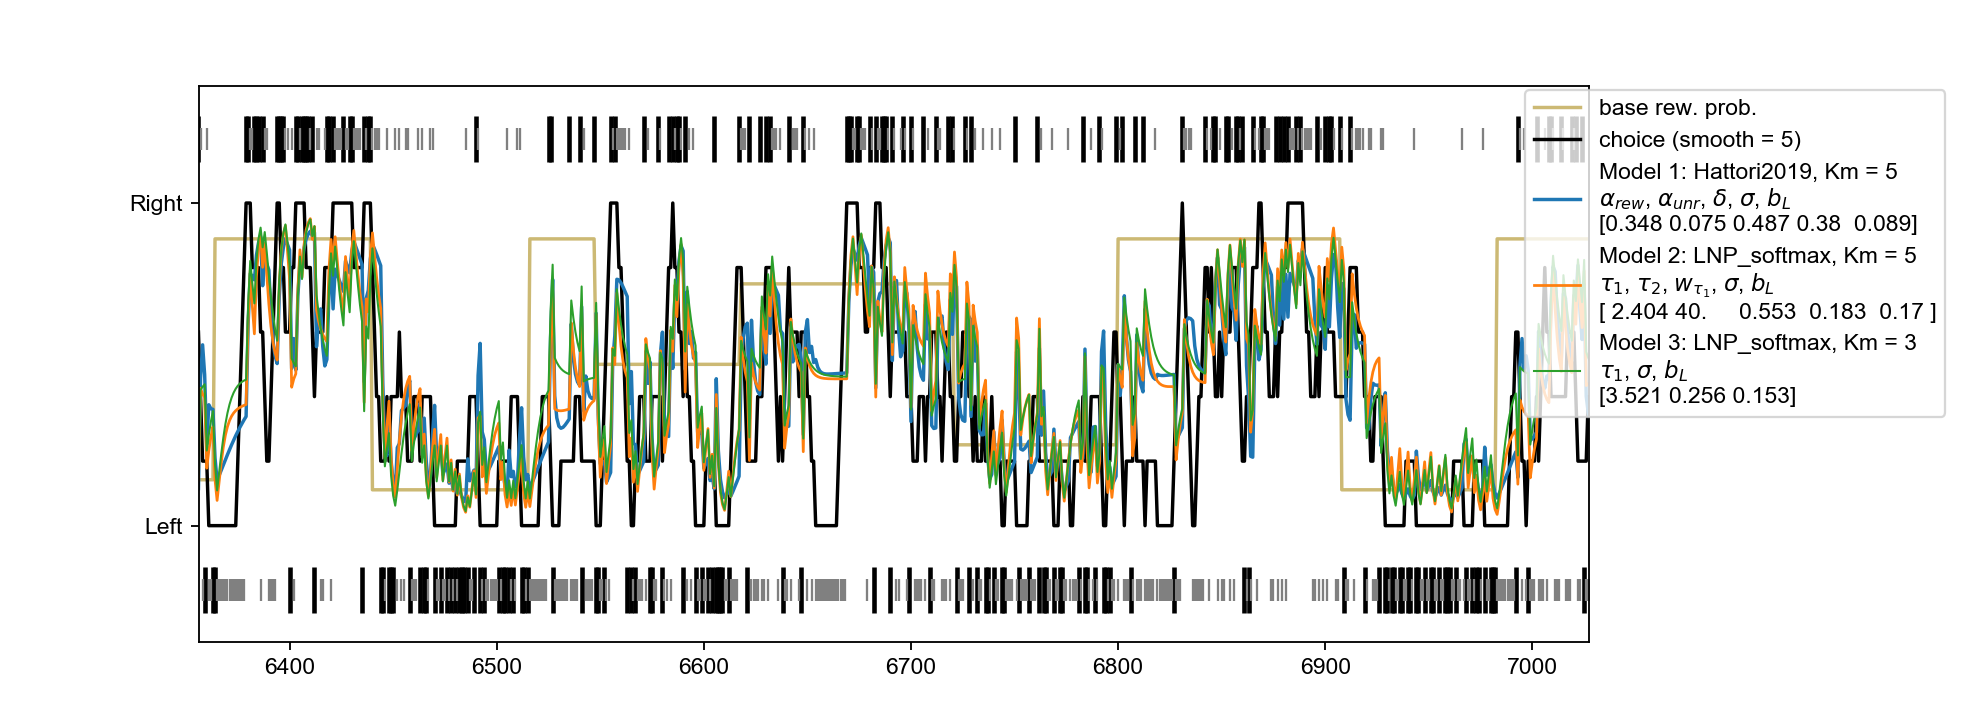

,model,Km,AIC,log10_BF_AIC,BIC,log10_BF_BIC,para_notation,para_fitted
8,Hattori2019,5,14749.24,-0.00,14786.77,-0.00,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$","[0.348, 0.075, 0.487, 0.38, 0.089]"
4,LNP_softmax,5,14955.87,-44.87,14993.40,-44.87,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$","[2.404, 40.0, 0.553, 0.183, 0.17]"
3,LNP_softmax,3,15109.41,-78.21,15131.92,-74.95,"$\tau_1$, $\sigma$, $b_L$","[3.521, 0.256, 0.153]"
7,Bari2019,4,15129.28,-82.52,15159.30,-80.89,"$\alpha_{rew}$, $\delta$, $\sigma$, $b_L$","[0.01, 0.241, 0.01, 0.154]"
6,Hattori2019,4,17173.00,-526.31,17203.02,-524.68,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$","[0.484, 0.299, 0.629, 0.173]"
5,RW1972_softmax,3,17195.13,-531.12,17217.64,-527.86,"$\alpha_{rew}$, $\sigma$, $b_L$","[0.343, 0.543, 0.175]"
2,RW1972_epsi,3,17506.18,-598.66,17528.70,-595.40,"$\alpha_{rew}$, $\epsilon$, $b_L$","[0.306, 0.697, 0.071]"
1,LossCounting,2,19078.30,-940.04,19093.31,-935.15,"$\mu_{LC}$, $\sigma_{LC}$","[9.004, 10.0]"


<IPython.core.display.Javascript object>


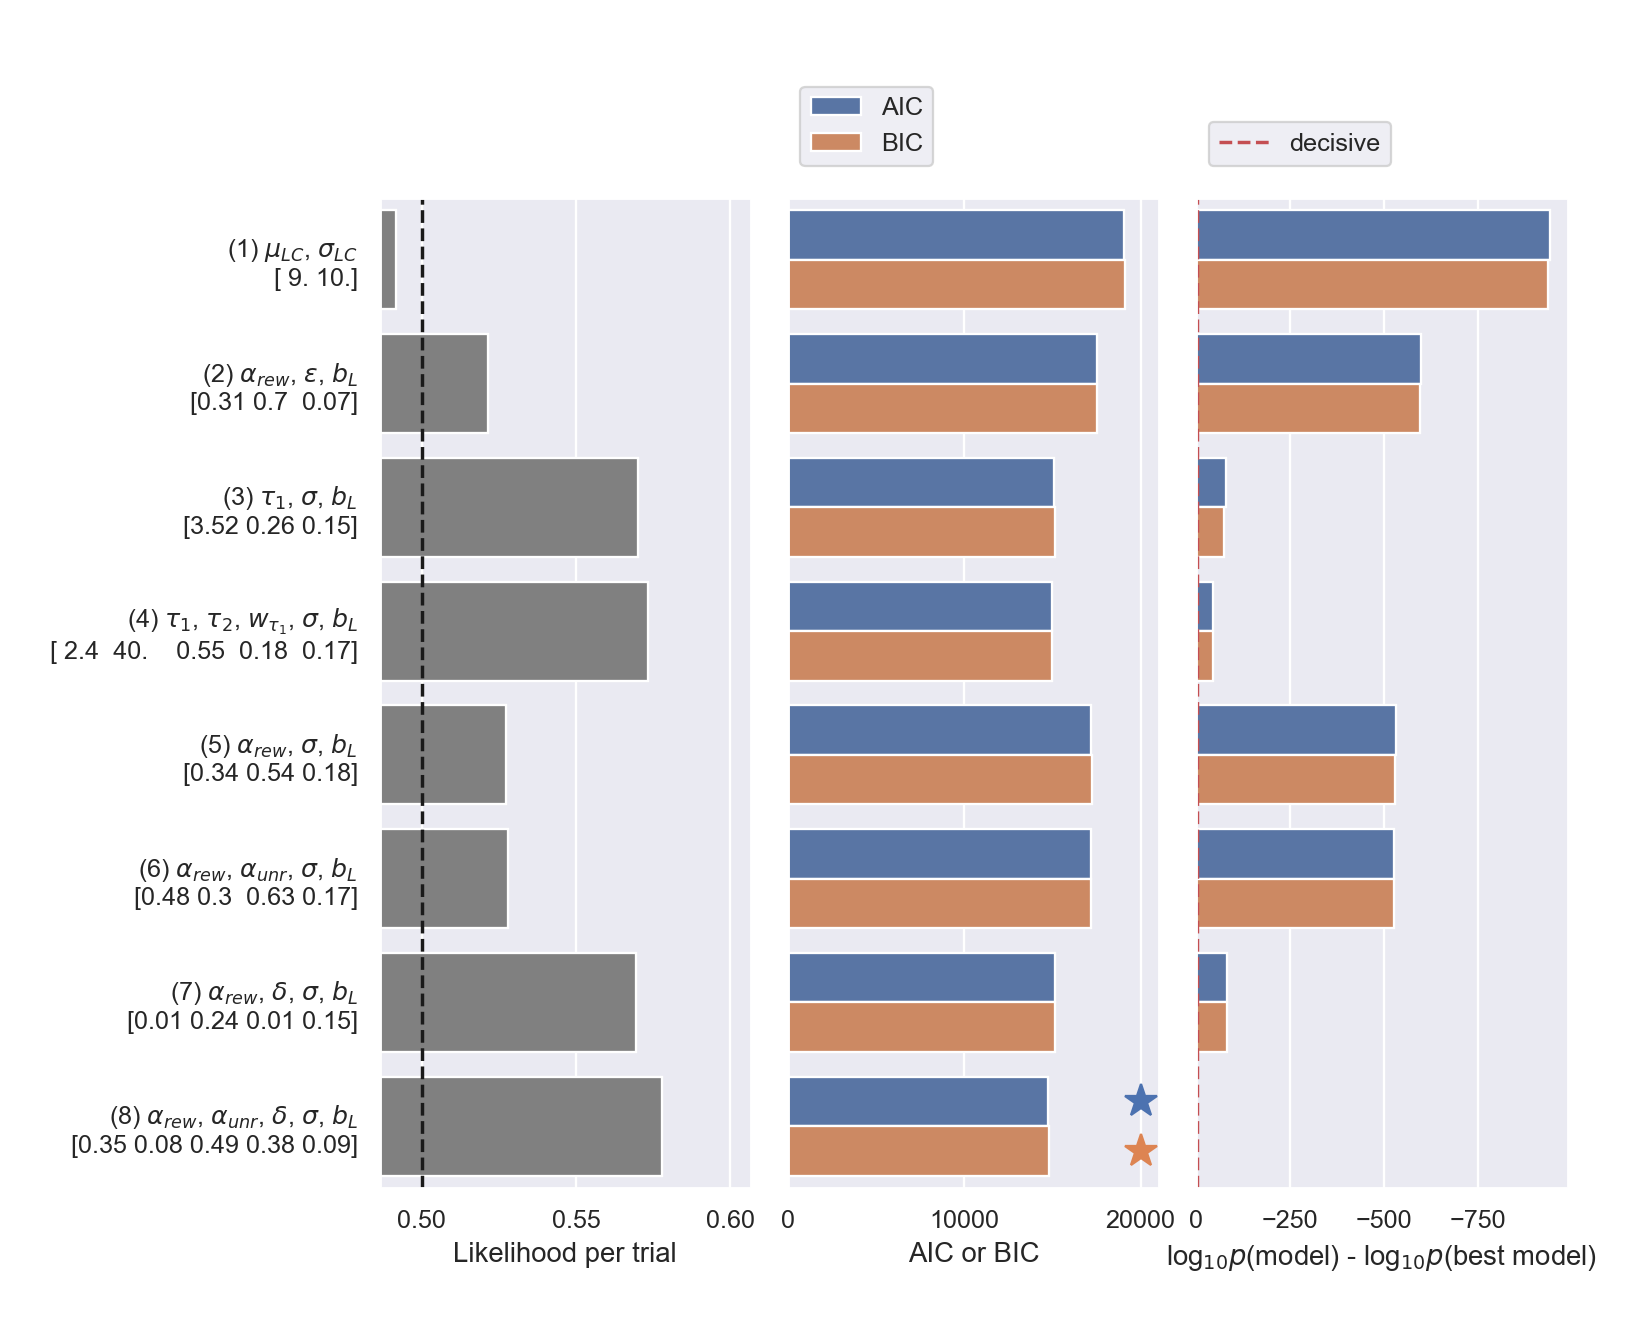

In [19]:
data = np.load("export\\FOR02.npz")
model_comparison = behavior_model_comparison(data, pool = pool, models = [1,9,10,11,12,13,14,15])